In [2]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
import pandas as pd  
import numpy as np
from sklearn.cluster import KMeans

In [7]:
data = pd.read_csv("D:/UCI/seeds.csv",names = ["area","perimeter","compactness"," length of kernel",
                                               " width of kernel","asymmetry coefficient",
                                               " length of kernel groove","seed"])
data.drop(columns=["seed"], inplace=True)
info = np.array(data)
info

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

In [5]:
from sklearn import preprocessing
import numpy as np
info_scaled = preprocessing.scale(info)
info_scaled 
#标准化

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

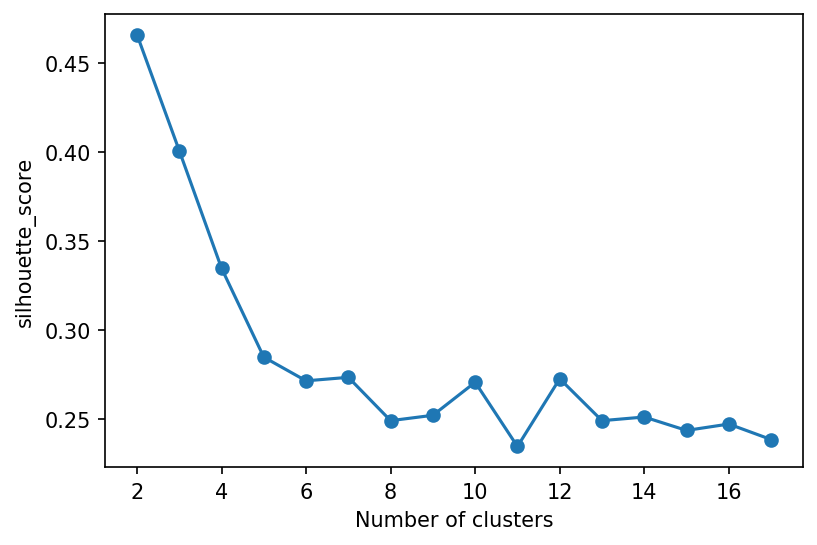

In [6]:
#轮廓系数
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X = info_scaled
scores = []
for i in range(2, 18):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    scores.append(metrics.silhouette_score(X, km.labels_ , metric='euclidean'))
plt.figure(dpi=150)
plt.plot(range(2,18), scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()

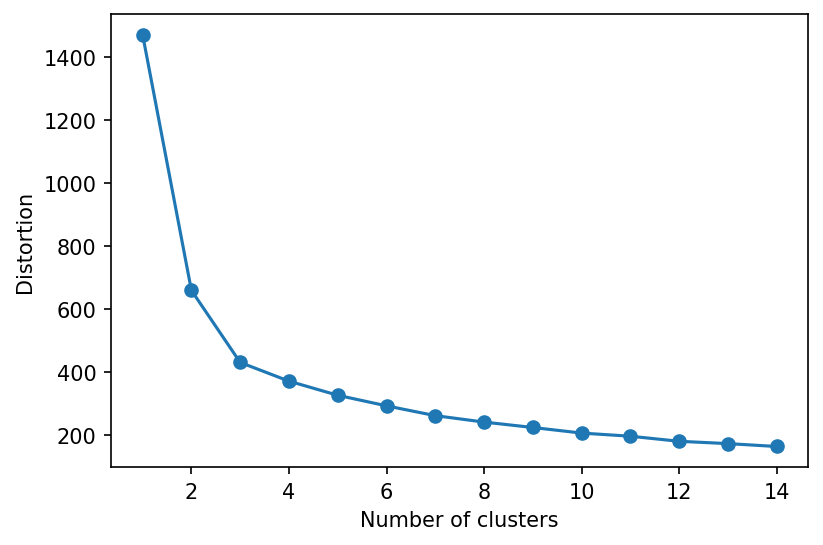

In [8]:
#肘部法则 畸变函数（代价函数）
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X = info_scaled
distortions = []
for i in range(1, 15):
        km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
plt.figure(dpi=150)
plt.plot(range(1,15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Text(0.5, 1.0, 'Tsne')

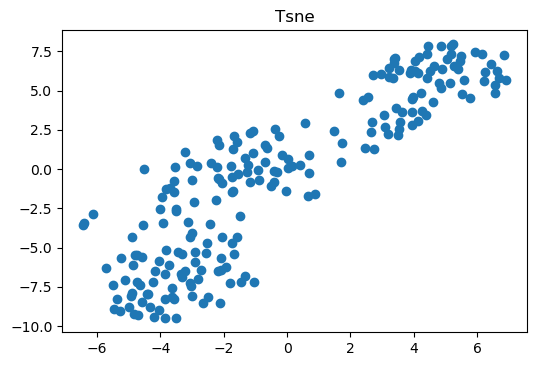

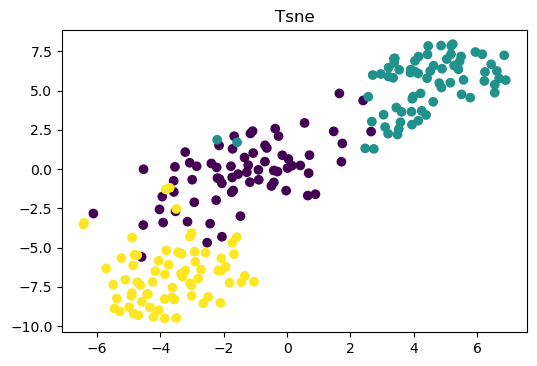

In [4]:
data = pd.read_csv("D:/UCI/seeds.csv",names = ["area","perimeter","compactness"," length of kernel",
                                               " width of kernel","asymmetry coefficient",
                                               " length of kernel groove","seed"])
info = np.array(data)
X = info
data_target = X[:,-1]
data = X[:,0:7]
from sklearn import preprocessing
import numpy as np
info_scaled = preprocessing.scale(data)
#标准化
tsne = TSNE(n_components=2,learning_rate = 100,perplexity = 50,random_state=1)
tsne.fit_transform(info_scaled )
data_tsne = tsne.fit_transform(info_scaled )
plt.figure( dpi=100)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1],alpha = 1)
plt.title('Tsne')
plt.figure( dpi=100)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=data_target,alpha = 1)
plt.title('Tsne')
#tsne可视化（真实分类）